In [64]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D


## Task 1.1 

In [65]:
def LaxWensolve(g0, BC, tend, N, M, a):
     deltaX = 1/N  # rumssteg från x0 till xN-1
     dt = tend/M  # tidsteg från t0 till tN
     Xgrid = np.linspace(0, 1, N)
     tgrid = np.linspace(0, tend, M+1)
     mu = dt/deltaX
     Tdx = la.toeplitz(np.array([1-(a*mu)**2, (a*mu)/2*(1+a*mu)] + [0] * (N-2)), np.array([1-(a*mu)**2, -(a*mu)/2*(1-a*mu)] + [0] * (N-2))) ##Skapar en Toeplitz matris för disc av andraderivatan
     Y = np.zeros((M+1, N)) #Första värdet är tidssteget, andra är x-steget.
     Y[0,:] = g0
     Y[1:,0] = BC

     for i in range(M):
          Y[i+1,1:] = (Tdx@np.transpose(Y[i, :]))[1:]
     return Y, Xgrid, tgrid
          


In [66]:
def pulse(x):
    return np.exp(-100*(x-0.5)**2)

In [67]:
def plot3D(Y, Xgrid, tgrid):
     T, X = np.meshgrid(np.transpose(tgrid), Xgrid)

     # Create a 3D plot
     fig = plt.figure(figsize=(10, 10))  # You can adjust the size as needed
     ax = fig.add_subplot(111, projection='3d')
     ax.plot_surface(T, X, np.transpose(Y))

     ax.set_xlabel('Time')
     ax.set_ylabel('Space')
     ax.set_zlabel('Value')

     plt.show()

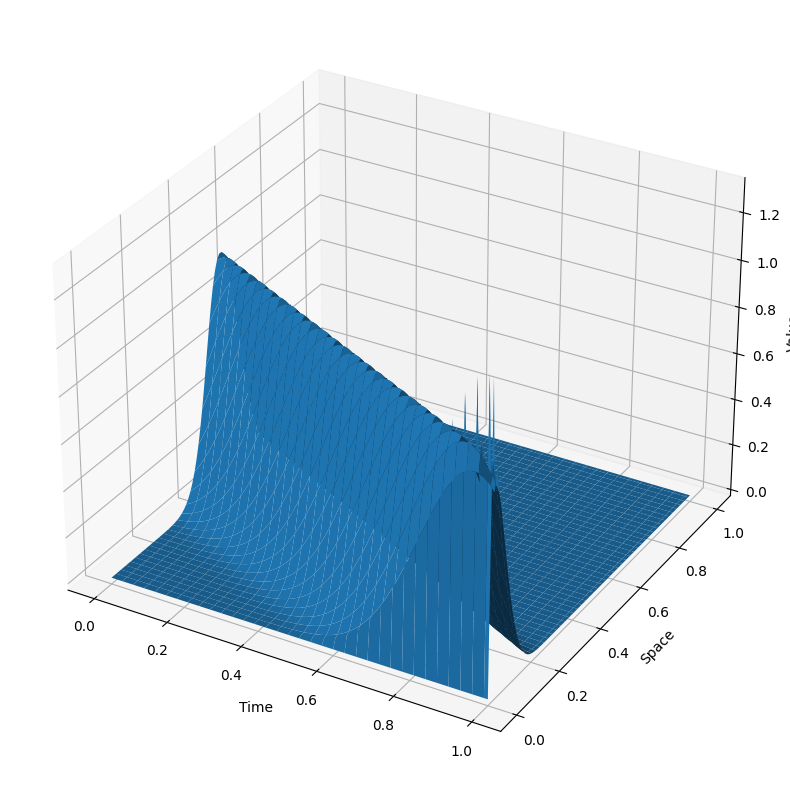

In [73]:
a = -1/2 # kan bara vara positiva värden
N = 100
M = 100
Xgrid = np.linspace(0, 1, N)
g0 = pulse(Xgrid)#np.zeros(N)
BC = np.zeros(M)
Y, Xgrid, tgrid = LaxWensolve(g0, BC, 1, N, M, a)
plot3D(Y, Xgrid, tgrid)


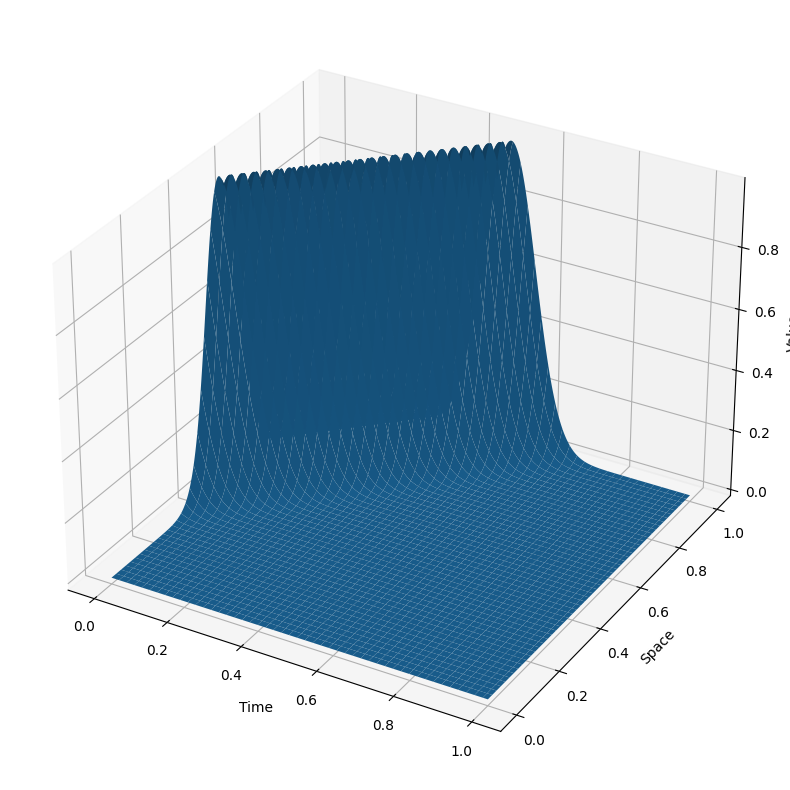

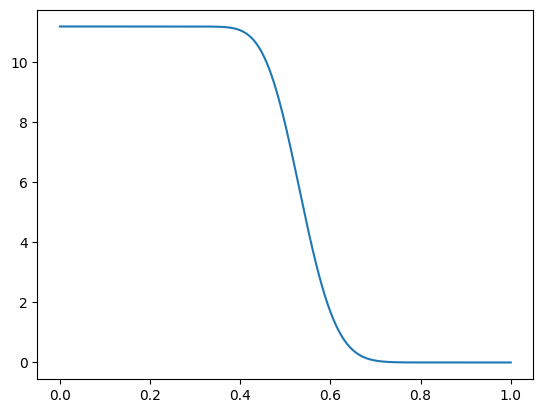

In [88]:
N = 1000
M = 1000
a = M/N
Xgrid = np.linspace(0, 1, N)
g0 = pulse(Xgrid)
BC = np.zeros(M)
Y, Xgrid, tgrid = LaxWensolve(g0, BC, 1, N, M, a)
plot3D(Y, Xgrid, tgrid)

RMS = np.zeros(M+1)

for i in range(M+1):
    RMS[i] = la.norm(Y[i,:])

plt.plot(tgrid, RMS)